In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
#!pip3 install sklearn

In [8]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image  
from sklearn import tree

In [10]:
#!pip install pydot

In [11]:
iris=pd.read_csv("iris.csv")
sd=iris.columns
sd
#iris.tail()

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [8]:
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [9]:
iris=iris.drop(['Unnamed: 0'],axis=1)
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
iris.isnull().any()

Sepal.Length    False
Sepal.Width     False
Petal.Length    False
Petal.Width     False
Species         False
dtype: bool

In [11]:
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [12]:
print(iris.shape)

(150, 5)


In [13]:
print(iris.describe())

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
#iris.Species

In [17]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

<AxesSubplot:ylabel='Species'>

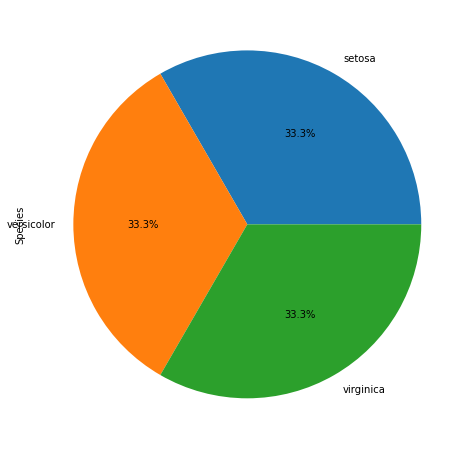

In [18]:
iris.Species.value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(8,8))

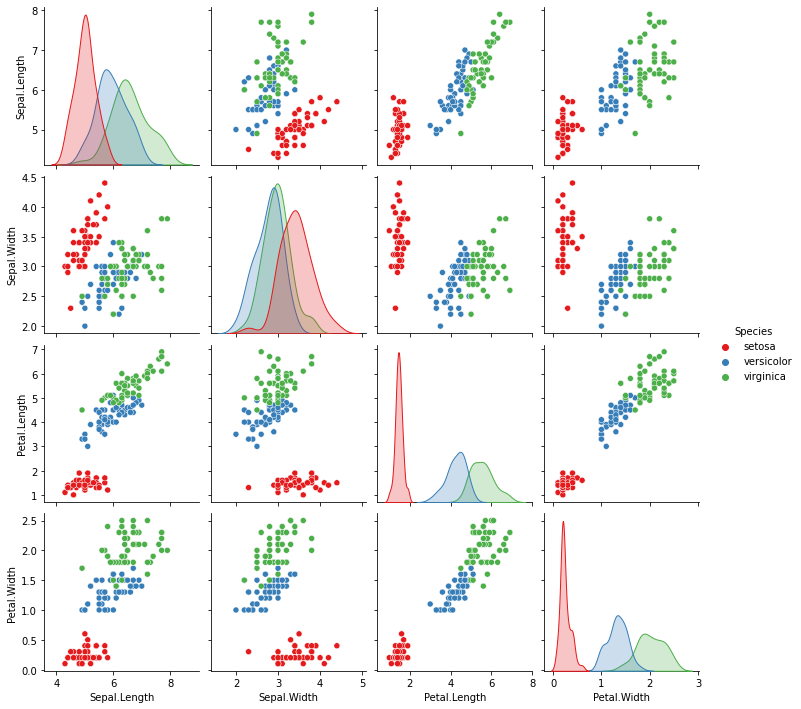

In [19]:
sns.pairplot(iris,hue='Species',palette='Set1')

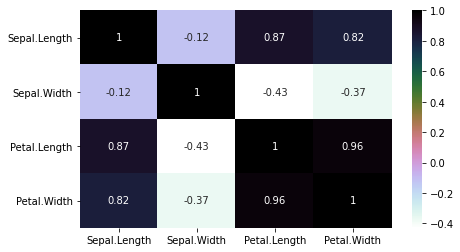

In [20]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')
plt.show()

<AxesSubplot:xlabel='Sepal.Length', ylabel='Sepal.Width'>

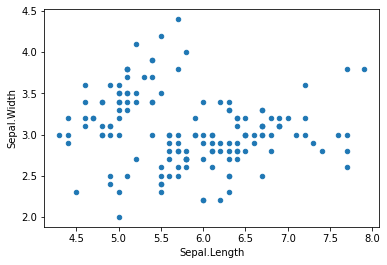

In [21]:
iris.plot(kind="scatter", x="Sepal.Length", y="Sepal.Width")

# Train Test Split
Let's split up the data into a training set and a test set!


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = iris.drop('Species',axis=1)
y = iris['Species']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# Decision Trees

We'll start just by training a single decision tree.


In [27]:
from sklearn.tree import DecisionTreeClassifier  

In [28]:
dtree = DecisionTreeClassifier()


In [29]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Prediction and Evaluation

In [30]:
print(X_test)
predictions = dtree.predict(X_test)
predictions

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
70            5.9          3.2           4.8          1.8
142           5.8          2.7           5.1          1.9
81            5.5          2.4           3.7          1.0
58            6.6          2.9           4.6          1.3
21            5.1          3.7           1.5          0.4
4             5.0          3.6           1.4          0.2
96            5.7          2.9           4.2          1.3
76            6.8          2.8           4.8          1.4
34            4.9          3.1           1.5          0.2
51            6.4          3.2           4.5          1.5
6             4.6          3.4           1.4          0.3
29            4.7          3.2           1.6          0.2
80            5.5          2.4           3.8          1.1
43            5.0          3.5           1.6          0.6
5             5.4          3.9           1.7          0.4


array(['virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa'], dtype=object)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      0.86      0.92         7
   virginica       0.50      1.00      0.67         1

    accuracy                           0.93        15
   macro avg       0.83      0.95      0.86        15
weighted avg       0.97      0.93      0.94        15



In [33]:
print(confusion_matrix(y_test,predictions))

[[7 0 0]
 [0 6 1]
 [0 0 1]]


In [34]:
#User input Prediction

In [36]:
data=[float(num) for num in (input("enter the data in order :Sepal.Length  Sepal.Width  Petal.Length  Petal.Width\t:").strip().split())]
predictions = dtree.predict([data])
print(predictions)

enter the data in order :Sepal.Length  Sepal.Width  Petal.Length  Petal.Width	:1 3 4 5
['virginica']


In [38]:
#!pip3 install graphviz
#sudo apt-get install graphviz

In [39]:
decision_tree = tree.export_graphviz(dtree,out_file='iris.dot',feature_names=X_train.columns,max_depth=3,filled=True)

In [40]:
decision_tree

In [41]:
!dot -Tpng iris.dot -o iris.png

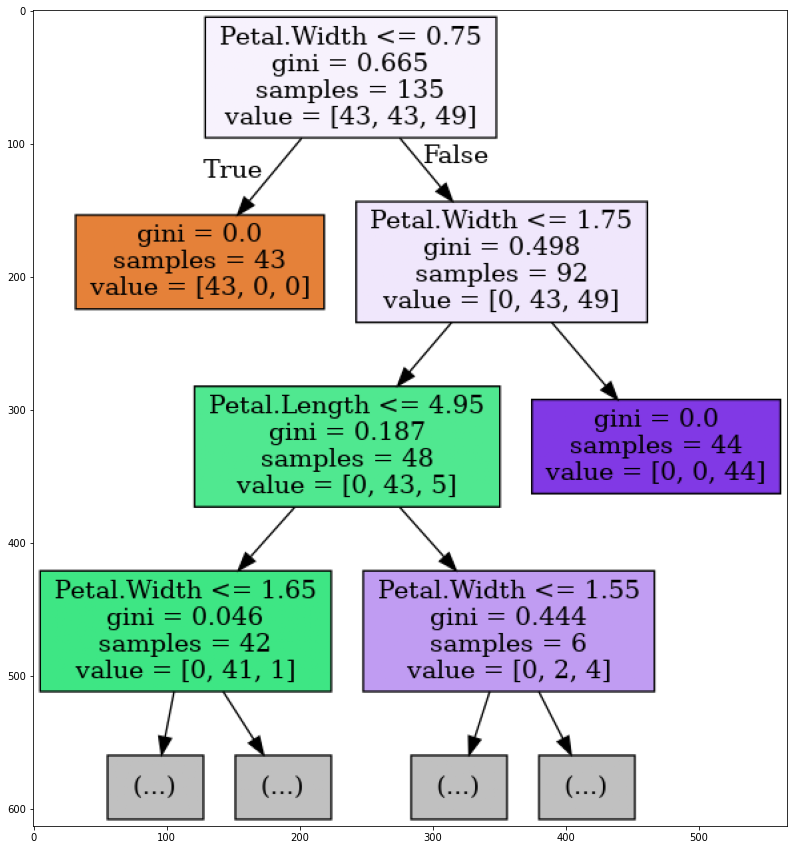

In [42]:
image = plt.imread('iris.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

In [44]:
#!pip3 install pickle-mixin

In [45]:
#Saving the Model
import pickle
pickle_file= open("decision_tree.pkl", "wb") 
pickle.dump(dtree, pickle_file) 
pickle_file.close()